Epoch 10/100 - Train Loss: 0.0303 - Val Loss: 0.2901 - Val Accuracy: 0.9150
Epoch 20/100 - Train Loss: 0.0236 - Val Loss: 0.2269 - Val Accuracy: 0.9200
Epoch 30/100 - Train Loss: 0.0225 - Val Loss: 0.2152 - Val Accuracy: 0.9200
Epoch 40/100 - Train Loss: 0.0221 - Val Loss: 0.2109 - Val Accuracy: 0.9250
Epoch 50/100 - Train Loss: 0.0218 - Val Loss: 0.2087 - Val Accuracy: 0.9275
Epoch 60/100 - Train Loss: 0.0216 - Val Loss: 0.2072 - Val Accuracy: 0.9275
Epoch 70/100 - Train Loss: 0.0215 - Val Loss: 0.2062 - Val Accuracy: 0.9300
Epoch 80/100 - Train Loss: 0.0214 - Val Loss: 0.2054 - Val Accuracy: 0.9275
Epoch 90/100 - Train Loss: 0.0213 - Val Loss: 0.2048 - Val Accuracy: 0.9300
Epoch 100/100 - Train Loss: 0.0212 - Val Loss: 0.2042 - Val Accuracy: 0.9300
test_accuracy :93.0000 %


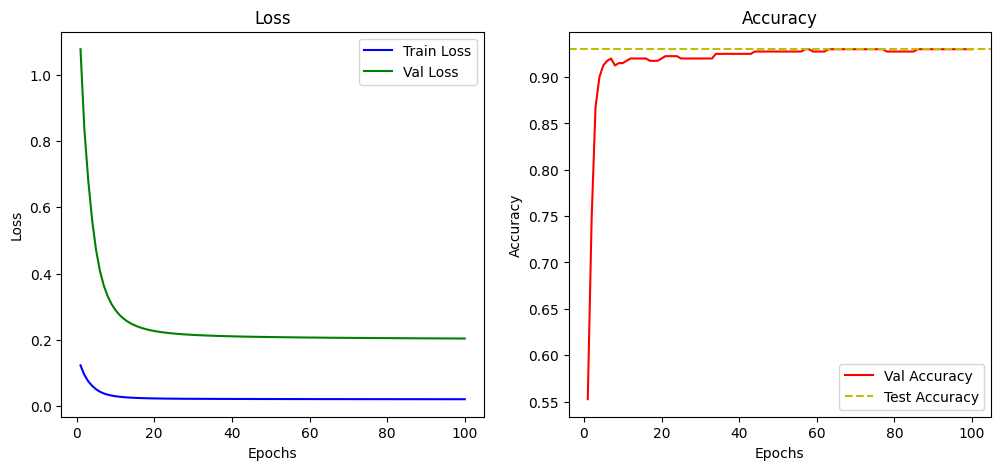

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = pd.read_csv('dataset.csv')

# 随机打乱数据集
data = data.sample(frac=1).reset_index(drop=True)


train_data, test_data, train_labels, test_labels = train_test_split(data[['data1', 'data2']], data['label'], test_size=0.1, random_state=42)


train_data = torch.tensor(train_data.values, dtype=torch.float32)
train_labels = torch.tensor(train_labels.values - 1, dtype=torch.long)
test_data = torch.tensor(test_data.values, dtype=torch.float32)
test_labels = torch.tensor(test_labels.values - 1, dtype=torch.long)


class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        #self.f = nn.ReLU()
        self.f = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.f(out)
        out = self.fc2(out)
        return out


input_size = 2
hidden_size = 16
num_classes = 4
num_epochs = 100
batch_size = 10
learning_rate = 0.001


model = Net(input_size, hidden_size, num_classes)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


train_losses = []
val_losses = []
val_accuracies = []
test_accuracies = []


for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i in range(0, len(train_data), batch_size):
        inputs = train_data[i:i+batch_size]
        labels = train_labels[i:i+batch_size]

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    val_outputs = model(test_data)
    val_loss = criterion(val_outputs, test_labels)
    _, val_predicted = torch.max(val_outputs.data, 1)
    val_total = test_labels.size(0)
    val_correct = (val_predicted == test_labels).sum().item()

    train_losses.append(running_loss / len(train_data))
    val_losses.append(val_loss.item())
    val_accuracies.append(val_correct / val_total)

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {running_loss / len(train_data):.4f} - Val Loss: {val_loss.item():.4f} - Val Accuracy: {val_correct / val_total:.4f}')

test_outputs = model(test_data)
_, test_predicted = torch.max(test_outputs.data, 1)
test_total = test_labels.size(0)
test_correct = (test_predicted == test_labels).sum().item()
test_accuracy = test_correct / test_total

print('test_accuracy :%.4f %%'%(100*test_accuracy))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, 'b-', label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, 'g-', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, 'r-', label='Val Accuracy')
plt.axhline(y=test_accuracy, color='y', linestyle='--', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()